In [ ]:
# Importing all the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

# libraries for text processing
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Improting specific objects from nltk
# 1. For removing common words -> words such as: "and", "or"...
from nltk.corpus import stopwords

# importing libraries for machine learning
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score

# We will ignore all warnings as they do not effect ther functionality of the code
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Opening the dataset as pandas dataframe
jobPost = pd.read_csv("fake_job_postings.csv")
jobPost.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Resampling the data

([<matplotlib.patches.Wedge at 0x2491979b740>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Non-Fraudulent'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fraudulent')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

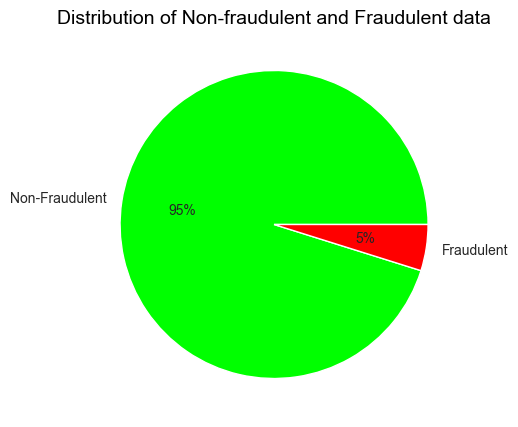

In [4]:
# Initial distribution of the data

labels=['Non-Fraudulent','Fraudulent']
colors = ['#00FF00','#FF0000']
plt.figure(figsize=(5,5))
plt.title('Distribution of Non-fraudulent and Fraudulent data',size=14)
sb.set_style('whitegrid')
plt.pie(jobPost['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

In [5]:
fake_df = jobPost[jobPost['fraudulent']==1]
real_df =jobPost[jobPost['fraudulent']==0]

# re-sampling the data
fake_df=fake_df.sample(17014,replace=True)
jobPost = pd.concat([fake_df, real_df], ignore_index=True)
jobPost.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,2445,Urgent Requirement For The Position Technical ...,"US, CA,",NaN,55-65,NaN,1. Technical Lead - Rhomobile Technical Mob...,Requirement / JD: Drive the mobile app develop...,NaN,0,0,1,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1
1,1,4355,Management System Administrator,"US, TX, Houston",Engineering,NaN,NaN,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Profi...,We offer • Friendly colleagues in an industry ...,0,0,0,NaN,NaN,NaN,Oil & Energy,Engineering,1
2,2,6561,Optician/Lab Technician,"US, OK, Chickasha",NaN,NaN,NaN,Optometric private practice group is seeking a...,"Responsibilities include dispensing eyewear, r...",We offer a team-oriented work environment and ...,0,0,0,Full-time,NaN,NaN,"Health, Wellness and Fitness",Sales,1
3,3,11629,Sales Professional- SMB (Full-Time),"US, MD, Baltimore",Sales and Research,21600-31200,Making Mobile Device Management Clear is Clear...,- Maintain a high level of Clearmark solution ...,Job Requirements High School Diploma or GEDPas...,401kHealth InsurancePaid Time OffVacation Time...,0,1,0,Full-time,Entry level,High School or equivalent,Computer & Network Security,Sales,1
4,4,17662,DATA ENTRY,"US, ,","Data Entry, Clerical Admin, Administrative Ass...",NaN,NaN,We produce Networking Software (IOS &amp; NX-O...,High SchoolBachelors Degree6 Month accounting ...,"Health, Dental, Life and AD&amp;D Insurance, ...",1,0,1,Other,Entry level,High School or equivalent,Computer Networking,Accounting/Auditing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34023,34023,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
34024,34024,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
34025,34025,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
34026,34026,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


([<matplotlib.patches.Wedge at 0x24919826510>,
 [Text(6.735557395310444e-17, 1.1, 'Non-Fraudulent'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraudulent')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

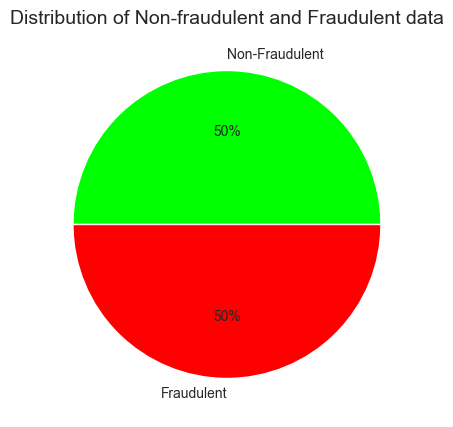

In [6]:
# Distribution of data after resamplingn

labels=['Non-Fraudulent','Fraudulent']
colors = ['#00FF00','#FF0000']
plt.figure(figsize=(5,5))
plt.title('Distribution of Non-fraudulent and Fraudulent data',size=14)
sb.set_style('whitegrid')
plt.pie(jobPost['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

# Data Preperation for ml models

### Filling NaN cells with empty string

<Axes: >

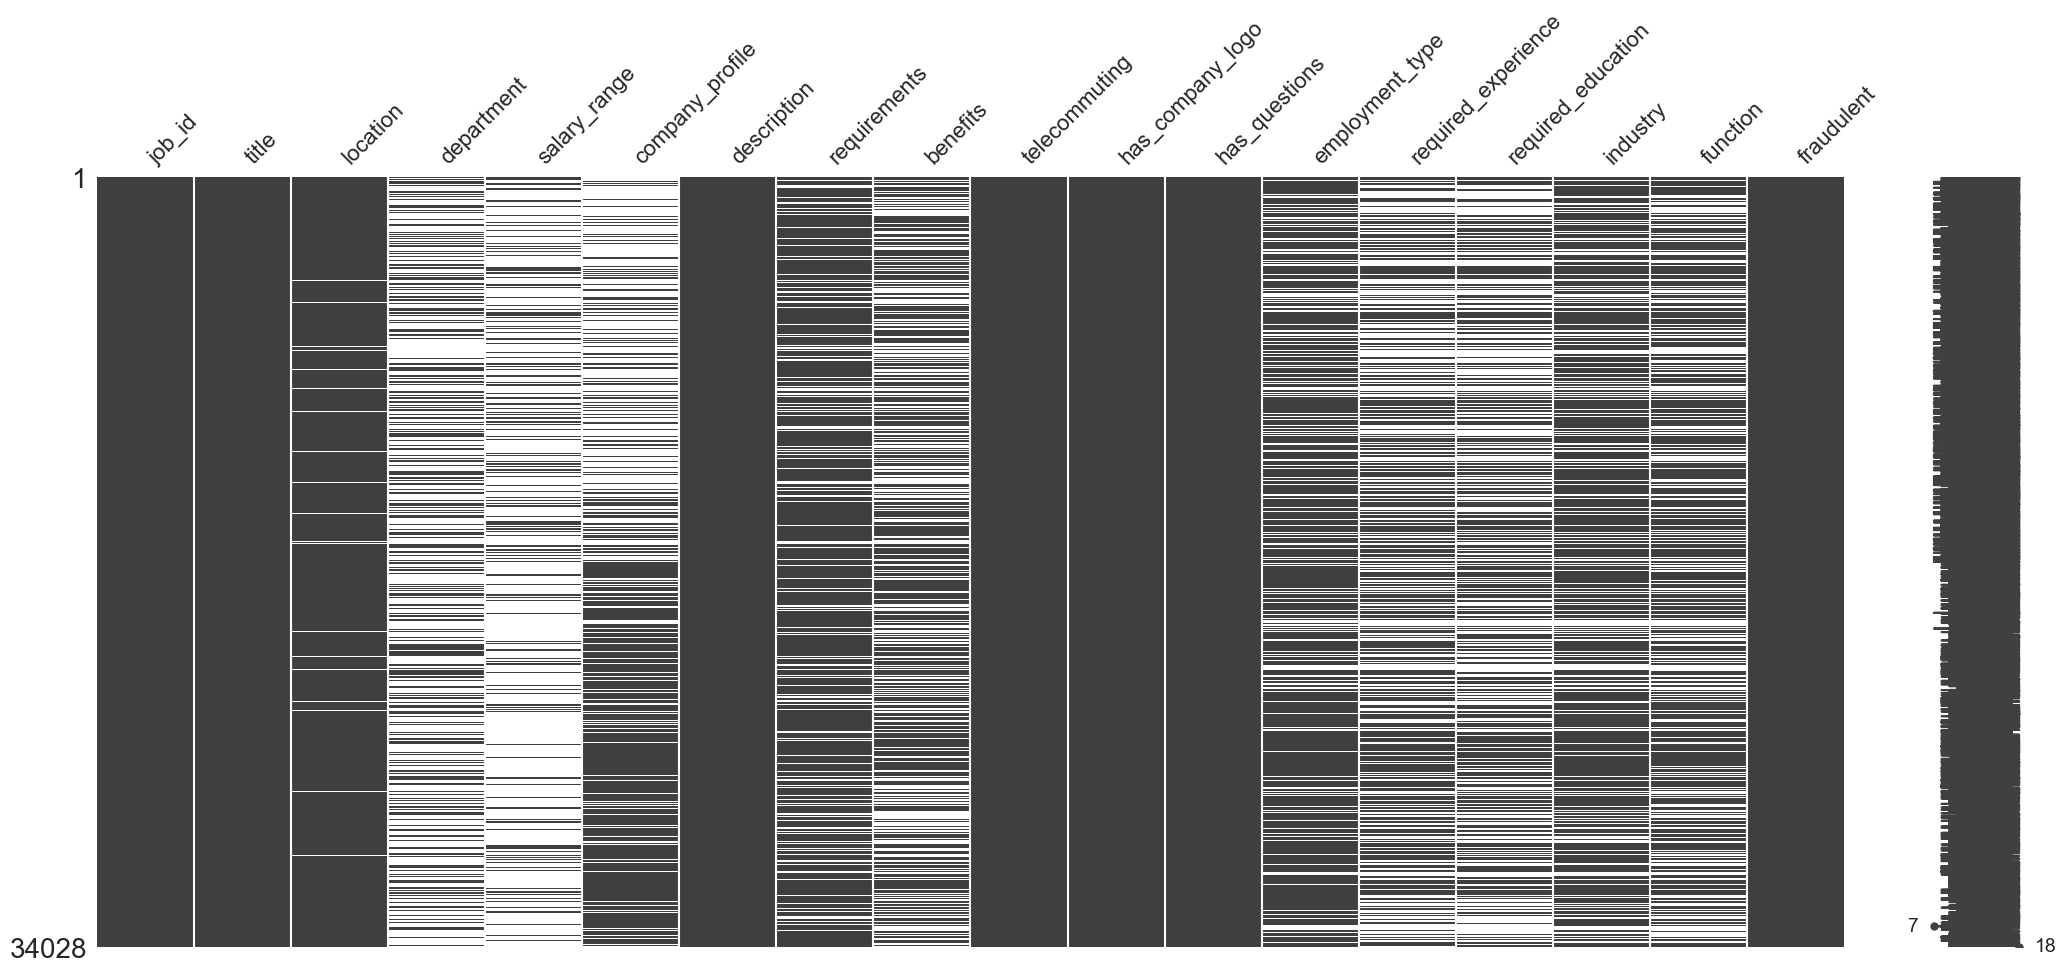

In [7]:
# missing values
import missingno
missingno.matrix(jobPost)

In [8]:
# As can be seen, lot of the data is missing (the white spaces) which needs to be filled with some str value
jobPost.fillna(' ', inplace=True)

### Removing columns that we established have no corelation with rediction

In [9]:
# Filling the missing data with space, ' '
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
jobPost.drop(columns = columns, inplace=True)

### combining all the text data in one column

In [11]:
# creating a new text column with empty string
jobPost['text'] = ' '

col_to_drop = []
for col_name in jobPost:
  if col_name not in ['fraudulent', 'text']:
    jobPost['text'] += jobPost[col_name] + ' '
    col_to_drop.append(col_name)

jobPost.drop(columns = col_to_drop, inplace = True)

In [12]:
jobPost.head()

,fraudulent,text
0,1,Urgent Requirement For The Position Technical...
1,1,"Management System Administrator US, TX, Houst..."
2,1,"Optician/Lab Technician US, OK, Chickasha ..."
3,1,"Sales Professional- SMB (Full-Time) US, MD, B..."
4,1,"DATA ENTRY US, , Data Entry, Clerical Admin,..."


# Machine Learning

## Data Preperation

### Tokenization

In [13]:
# text preprocessing(cleaning)
stop_words = set(stopwords.words('english'))

def basic_cleaning(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)

    # Remove stop words
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)

    return text

# Apply the combined function to the 'job_posting' column
jobPost['text'] = jobPost['text'].apply(basic_cleaning)

In [14]:
frd_txt = jobPost[jobPost.fraudulent==1].text
act_txt = jobPost[jobPost.fraudulent==0].text

In [15]:
# Tokenize each job posting into words
jobPost['text_tokens'] = jobPost['text'].apply(word_tokenize)

# Tokenize each job posting into sentences
jobPost['text_sentences'] = jobPost['text'].apply(sent_tokenize)

##### Splitting into train and test

##### Vectorization of the text data

In [17]:
# the purpose that we need one squence the has key feature from each text in column 'job_posting_tokens' for task classification

# Flatten the list of lists into a single list of strings
X_flattened = [' '.join(sublist) for sublist in jobPost['text_tokens']]

# Vectorize the text data
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_flattened)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, jobPost['fraudulent'], test_size=0.2, random_state=42)

In [19]:
def model_scores(y_train, y_train_pred ,y_test,y_test_pred):
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    mse= mean_squared_error(y_test, y_test_pred)
    rmse= mean_squared_error(y_test, y_test_pred, squared=False)

    print(f"Train Set Accuracy: {accuracy_train}")
    print(f"Test set accuracy: {accuracy_test}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1}")
    print(f"Test set Mean Square Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")

### Logistic Regression

Train Set Accuracy: 1.0
Test set accuracy: 0.9939759036144579
Precision: 0.9880952380952381
Recall: 1.0
F1 score: 0.9940119760479041
Test set Mean Square Error: 0.006024096385542169
Root Mean Squared Error: 0.0776150525706333


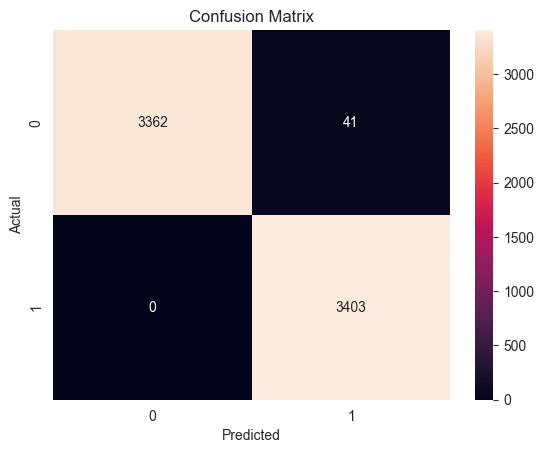

In [20]:
# Initialize the logistic regression model with the best max_iter value and fit the model to training data
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

# Predict on the training and testing set                     
y_pred_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)  

#Evaluating the model performance
model_scores(y_train, y_pred_train_lr ,y_test,y_pred_lr)

#Plotting heatmap for test data
sb.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='rocket', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Multinomial Naive Bayes

Train Set Accuracy: 0.9837263977665124
Test set accuracy: 0.9782544813399942
Precision: 0.9737991266375546
Recall: 0.9829562151043197
F1 score: 0.9783562445159404
Test set Mean Square Error: 0.021745518660005878
Root Mean Squared Error: 0.14746361808936426


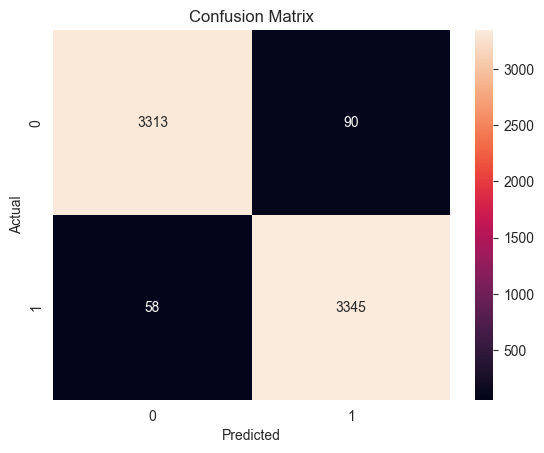

In [21]:
#Initialize and fit
mNB = MultinomialNB()  
mNB.fit(X_train, y_train)                  

# Predict on the training and testing set
y_pred_train_mNB = mNB.predict(X_train)  
y_pred_mNB = mNB.predict(X_test)                       

#Evaluating the model performance
model_scores(y_train, y_pred_train_mNB ,y_test,y_pred_mNB)

#Plotting heatmap for test data
sb.heatmap(confusion_matrix(y_test, y_pred_mNB), annot=True, cmap='rocket', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()